# Manual ROC Curve Implementation for Beta Variable
This notebook implements a manual ROC curve analysis for the beta variable using the 3-classes dataset.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time

import mplhep as hep
plt.style.use(hep.style.ATLAS)

FilePath=filepath

In [2]:
# Load DataFrame from pickle file

start_time = time.time()
df = pd.read_pickle(FilePath+'df_3classes.pkl')
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 0.5024 seconds


In [3]:
# Load the weight array from the saved numpy file
weightarr = np.load(FilePath+'weightarr.npy')

print(f"✅ Successfully loaded weightarr from weightarr.npy")
print(f"📊 Weight array shape: {weightarr.shape}")
print(f"📈 Weight range: [{weightarr.min():.6f}, {weightarr.max():.6f}]")
print(f"📊 Mean weight: {weightarr.mean():.6f}")
print(f"📊 Standard deviation: {weightarr.std():.6f}")
print(f"🔍 First 10 weights: {weightarr[:10]}")

✅ Successfully loaded weightarr from weightarr.npy
📊 Weight array shape: (908258,)
📈 Weight range: [-738.100647, 738.100647]
📊 Mean weight: 730.565857
📊 Standard deviation: 89.569733
🔍 First 10 weights: [736.41705 736.41705 736.41705 736.41705 736.41705 736.41705 736.41705
 736.41705 736.41705 736.41705]


In [4]:
#Printing the df
df['weights_MC_NOSYS']=weightarr
df

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911143,0.259679,576.068012,0.191586,104.567887,5,-2.084358,2.084869,-1.135551,3.314730,0.938952,0.939661,0.962644,-0.962644,0,736.358765
911144,0.673129,422.433023,0.669301,40.949288,4,-1.462806,1.501093,-0.827567,3.177839,0.743676,0.647817,-0.611192,0.611192,0,736.358765
911145,0.52574,364.731574,0.498128,72.093790,6,-0.913760,1.689758,0.853770,1.151561,0.001788,0.444925,-0.646433,0.646433,0,736.358765
911146,0.040545,940.773049,0.016064,35.050987,4,-3.304555,4.148650,-3.870364,4.825702,-0.183372,-0.567504,-0.483828,0.483828,0,736.358765


In [12]:
len(df['weights_MC_NOSYS'][df['weights_MC_NOSYS']<0])

#Some info about Mc weights
print("=" * 80)
print(f'------------------------------ Informative panel -------------------------------')
print("=" * 80)
print(f"| Total number of SGN events : {len(df[df['prod_type']==0])} \t\t\t\t\t\t|")
print(f"| Total number of BCK events : {len(df[df['prod_type']==1])+len(df[df['prod_type']==2])} \t\t\t\t\t\t|")
print("=" * 80)
print(f"| Total number of SGN MC weights < 0 : {len(df['weights_MC_NOSYS'][df['prod_type']==0][df['weights_MC_NOSYS'][df['prod_type']==0]<0])} || relative fraction: {(len(df['weights_MC_NOSYS'][df['prod_type']==0][df['weights_MC_NOSYS'][df['prod_type']==0]<0])/len(df['weights_MC_NOSYS'][df['prod_type']==0]))*100:.3f}% \t|")
print(f"| Total number of BCK MC weights < 0 : {len(df['weights_MC_NOSYS'][df['prod_type']==1][df['weights_MC_NOSYS'][df['prod_type']==1]<0])+len(df['weights_MC_NOSYS'][df['prod_type']==2][df['weights_MC_NOSYS'][df['prod_type']==2]<0])} || relative fraction: {(len(df['weights_MC_NOSYS'][df['prod_type']==1][df['weights_MC_NOSYS'][df['prod_type']==1]<0]+len(df['weights_MC_NOSYS'][df['prod_type']==2][df['weights_MC_NOSYS'][df['prod_type']==2]<0])/(len(df['weights_MC_NOSYS'][df['prod_type']==1])+len(df['weights_MC_NOSYS'][df['prod_type']==2]))))*100:.5f}% \t\t|")
print("=" * 80)

------------------------------ Informative panel -------------------------------
| Total number of SGN events : 794173 						|
| Total number of BCK events : 114085 						|
| Total number of SGN MC weights < 0 : 3330 || relative fraction: 0.419% 	|
| Total number of BCK MC weights < 0 : 45 || relative fraction: 0.00000% 		|


In [13]:
mask = df['weights_MC_NOSYS'] > 0
df_cut = df[mask]
df_cut

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911143,0.259679,576.068012,0.191586,104.567887,5,-2.084358,2.084869,-1.135551,3.314730,0.938952,0.939661,0.962644,-0.962644,0,736.358765
911144,0.673129,422.433023,0.669301,40.949288,4,-1.462806,1.501093,-0.827567,3.177839,0.743676,0.647817,-0.611192,0.611192,0,736.358765
911145,0.52574,364.731574,0.498128,72.093790,6,-0.913760,1.689758,0.853770,1.151561,0.001788,0.444925,-0.646433,0.646433,0,736.358765
911146,0.040545,940.773049,0.016064,35.050987,4,-3.304555,4.148650,-3.870364,4.825702,-0.183372,-0.567504,-0.483828,0.483828,0,736.358765


## gg vs gq study

In [15]:
mask_gq = (df_cut['prod_type'] == 0) | (df_cut['prod_type'] == 1)
df_gq=df_cut[mask_gq]
# df_qq['prod_type'][df_qq['prod_type']==2]=1
df_gq

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911143,0.259679,576.068012,0.191586,104.567887,5,-2.084358,2.084869,-1.135551,3.314730,0.938952,0.939661,0.962644,-0.962644,0,736.358765
911144,0.673129,422.433023,0.669301,40.949288,4,-1.462806,1.501093,-0.827567,3.177839,0.743676,0.647817,-0.611192,0.611192,0,736.358765
911145,0.52574,364.731574,0.498128,72.093790,6,-0.913760,1.689758,0.853770,1.151561,0.001788,0.444925,-0.646433,0.646433,0,736.358765
911146,0.040545,940.773049,0.016064,35.050987,4,-3.304555,4.148650,-3.870364,4.825702,-0.183372,-0.567504,-0.483828,0.483828,0,736.358765


🔍 Preparing data for ROC analysis...
Beta variable statistics:
  Range: [0.0014, 0.9894]
  Mean: 0.5037
  Std: 0.2413

📊 Signal vs Background beta distributions:
Signal - Mean: 0.5004, Std: 0.2414
Background - Mean: 0.5824, Std: 0.2259


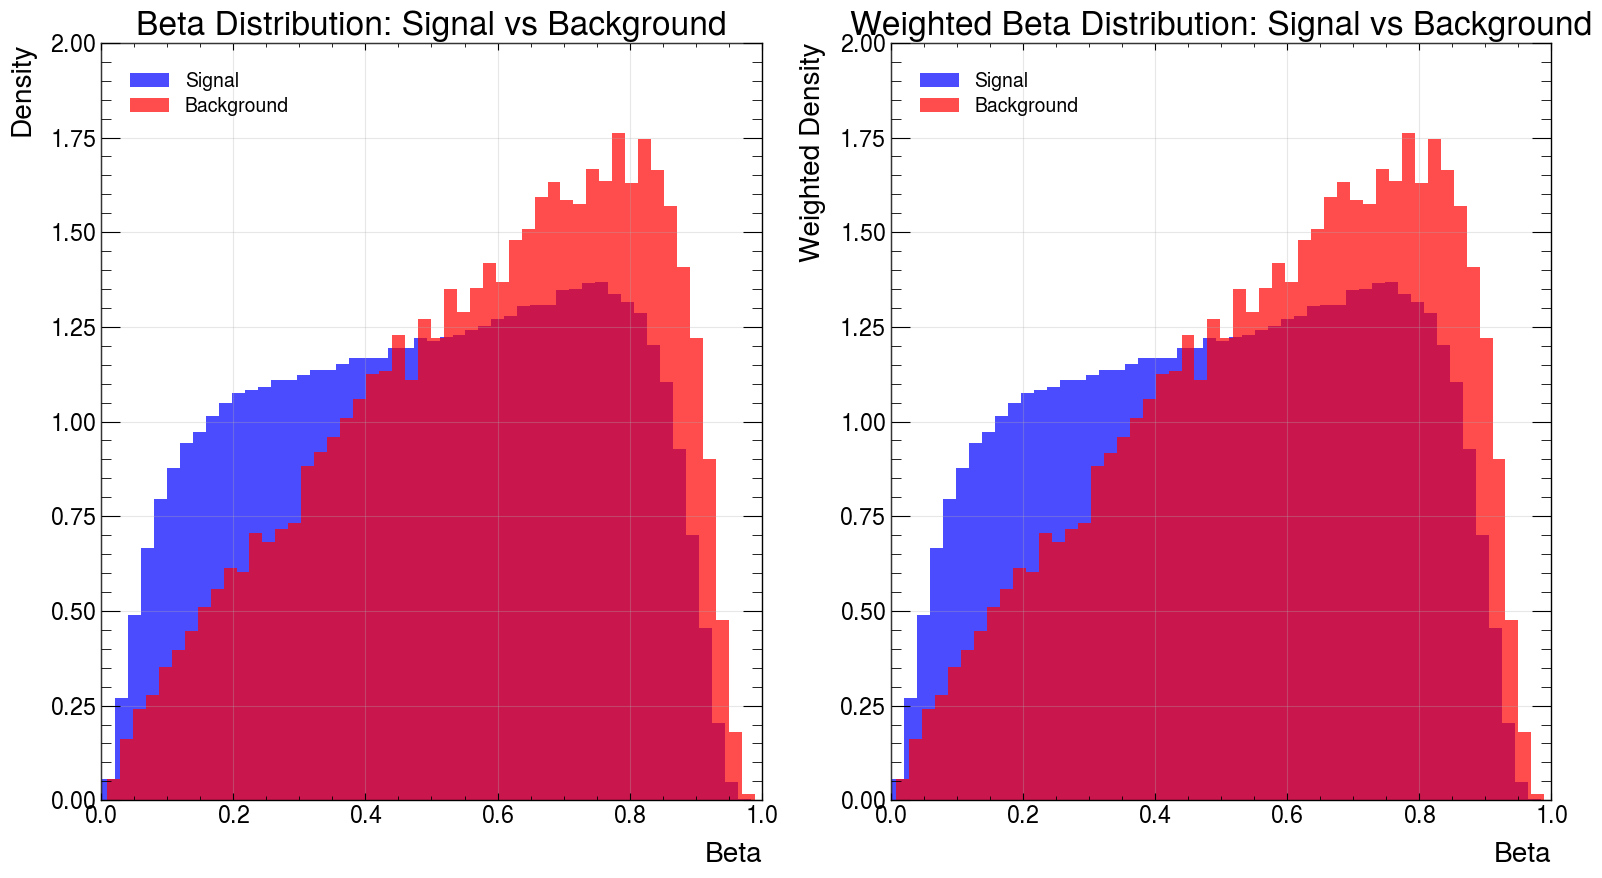

✅ Data prepared for ROC analysis


In [17]:
# Extract beta variable and labels for ROC analysis
print("🔍 Preparing data for ROC analysis...")

# Extract the beta variable
beta_values = df_gq['beta'].values
labels = df_gq['prod_type'].values  # 0 = signal, 1 = background
weights = df_gq['weights_MC_NOSYS'].values

print(f"Beta variable statistics:")
print(f"  Range: [{beta_values.min():.4f}, {beta_values.max():.4f}]")
print(f"  Mean: {beta_values.mean():.4f}")
print(f"  Std: {beta_values.std():.4f}")

# Separate signal and background
signal_mask = (labels == 0)
background_mask = (labels == 1)

beta_signal = beta_values[signal_mask]
beta_background = beta_values[background_mask]
weights_signal = weights[signal_mask]
weights_background = weights[background_mask]

print(f"\n📊 Signal vs Background beta distributions:")
print(f"Signal - Mean: {beta_signal.mean():.4f}, Std: {beta_signal.std():.4f}")
print(f"Background - Mean: {beta_background.mean():.4f}, Std: {beta_background.std():.4f}")

# Plot distributions
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.hist(beta_signal, bins=50, alpha=0.7, label='Signal', color='blue', density=True)
plt.hist(beta_background, bins=50, alpha=0.7, label='Background', color='red', density=True)
plt.xlabel('Beta')
plt.ylabel('Density')
plt.title('Beta Distribution: Signal vs Background')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(beta_signal, bins=50, alpha=0.7, label='Signal', color='blue', density=True, weights=weights_signal)
plt.hist(beta_background, bins=50, alpha=0.7, label='Background', color='red', density=True, weights=weights_background)
plt.xlabel('Beta')
plt.ylabel('Weighted Density')
plt.title('Weighted Beta Distribution: Signal vs Background')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✅ Data prepared for ROC analysis")

In [18]:
# Manual ROC curve implementation using proper confusion matrix definitions
print("🔄 Computing ROC curve manually...")
start_time = time.time()

# Define threshold range with 0.01 steps
min_beta = beta_values.min()
max_beta = beta_values.max()
thresholds = np.arange(min_beta, max_beta + 0.5, 0.001)

print(f"Scanning {len(thresholds)} thresholds from {min_beta:.3f} to {max_beta:.3f}")

# Initialize arrays for ROC curve
tpr_values = []  # True Positive Rate = TP/(TP+FN)
fpr_values = []  # False Positive Rate = FP/(FP+TN)
threshold_values = []

# Total actual event counts (not weighted)
total_signal_events = len(beta_signal)  # All signal events
total_background_events = len(beta_background)  # All background events

print(f"Total signal events: {total_signal_events}")
print(f"Total background events: {total_background_events}")

# Loop through thresholds
for i, threshold in enumerate(thresholds):
    # if beta < threshold, predict signal
    # Confusion matrix components:
    
    # True Positives (TP): Signal events correctly classified as signal (beta < threshold)
    TP = np.sum(beta_signal < threshold)
    
    # False Negatives (FN): Signal events incorrectly classified as background (beta >= threshold)
    FN = np.sum(beta_signal >= threshold)
    
    # False Positives (FP): Background events incorrectly classified as signal (beta < threshold)
    FP = np.sum(beta_background < threshold)
    
    # True Negatives (TN): Background events correctly classified as background (beta >= threshold)
    TN = np.sum(beta_background >= threshold)
    
    # Verify totals (sanity check)
    assert TP + FN == total_signal_events, f"Signal count mismatch: {TP + FN} != {total_signal_events}"
    assert FP + TN == total_background_events, f"Background count mismatch: {FP + TN} != {total_background_events}"
    
    # Calculate TPR and FPR using proper definitions
    tpr = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate = TP/(TP+FN)
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate = FP/(FP+TN)
    
    tpr_values.append(tpr)
    fpr_values.append(fpr)
    threshold_values.append(threshold)
    
    # Progress update
    if (i + 1) % 100 == 0 or i == len(thresholds) - 1:
        print(f"  Processed {i+1}/{len(thresholds)} thresholds... (TP={TP}, FP={FP}, FN={FN}, TN={TN})")

# Convert to numpy arrays
tpr_values = np.array(tpr_values)
fpr_values = np.array(fpr_values)
threshold_values = np.array(threshold_values)

computation_time = time.time() - start_time
print(f"✅ ROC computation completed in {computation_time:.2f} seconds")
print(f"TPR range: [{tpr_values.min():.4f}, {tpr_values.max():.4f}]")
print(f"FPR range: [{fpr_values.min():.4f}, {fpr_values.max():.4f}]")

# Verification: Check that we have the expected range of values
print(f"\n🔍 Sanity checks:")
print(f"  TPR should be in [0,1]: {0 <= tpr_values.min() and tpr_values.max() <= 1}")
print(f"  FPR should be in [0,1]: {0 <= fpr_values.min() and fpr_values.max() <= 1}")
print(f"  At lowest threshold, TPR should be ~0.0: {tpr_values[0]:.4f}")
print(f"  At highest threshold, TPR should be ~1.0: {tpr_values[-1]:.4f}")
print(f"  At lowest threshold, FPR should be ~0.0: {fpr_values[0]:.4f}")
print(f"  At highest threshold, FPR should be ~1.0: {fpr_values[-1]:.4f}")

🔄 Computing ROC curve manually...
Scanning 1488 thresholds from 0.001 to 0.989
Total signal events: 790843
Total background events: 32932
  Processed 100/1488 thresholds... (TP=35879, FP=636, FN=754964, TN=32296)
  Processed 200/1488 thresholds... (TP=112995, FP=2244, FN=677848, TN=30688)
  Processed 300/1488 thresholds... (TP=199552, FP=4487, FN=591291, TN=28445)
  Processed 400/1488 thresholds... (TP=290090, FP=7646, FN=500753, TN=25286)
  Processed 500/1488 thresholds... (TP=384308, FP=11508, FN=406535, TN=21424)
  Processed 600/1488 thresholds... (TP=482205, FP=15878, FN=308638, TN=17054)
  Processed 700/1488 thresholds... (TP=585248, FP=20914, FN=205595, TN=12018)
  Processed 800/1488 thresholds... (TP=692013, FP=26364, FN=98830, TN=6568)
  Processed 900/1488 thresholds... (TP=777545, FP=31503, FN=13298, TN=1429)
  Processed 1000/1488 thresholds... (TP=790843, FP=32932, FN=0, TN=0)
  Processed 1100/1488 thresholds... (TP=790843, FP=32932, FN=0, TN=0)
  Processed 1200/1488 threshol

In [19]:
# Calculate AUC using trapezoidal rule
print("📊 Computing Area Under Curve (AUC)...")

# Sort by FPR for proper integration
sorted_indices = np.argsort(fpr_values)
fpr_sorted = fpr_values[sorted_indices]
tpr_sorted = tpr_values[sorted_indices]

# Manual AUC calculation using trapezoidal rule
auc_manual = 0.0
for i in range(1, len(fpr_sorted)):
    # Trapezoidal rule: Area = (x2-x1) * (y1+y2)/2
    dx = fpr_sorted[i] - fpr_sorted[i-1]
    dy = (tpr_sorted[i] + tpr_sorted[i-1]) / 2
    auc_manual += dx * dy

# Alternative: using numpy trapz
auc_numpy = np.trapz(tpr_sorted, fpr_sorted)

print(f"✅ AUC Results:")
print(f"  Manual calculation: {auc_manual:.6f}")
print(f"  NumPy trapz method: {auc_numpy:.6f}")
print(f"  Difference: {abs(auc_manual - auc_numpy):.8f}")

# Performance interpretation
if auc_manual > 0.9:
    performance = "Excellent"
elif auc_manual > 0.8:
    performance = "Good"
elif auc_manual > 0.7:
    performance = "Fair"
elif auc_manual > 0.6:
    performance = "Poor"
else:
    performance = "Very Poor"

print(f"\n🎯 Beta variable discrimination performance: {performance}")
print(f"AUC = {auc_manual:.4f} (1.0 = perfect, 0.5 = random)")

📊 Computing Area Under Curve (AUC)...
✅ AUC Results:
  Manual calculation: 0.597333
  NumPy trapz method: 0.597333
  Difference: 0.00000000

🎯 Beta variable discrimination performance: Very Poor
AUC = 0.5973 (1.0 = perfect, 0.5 = random)


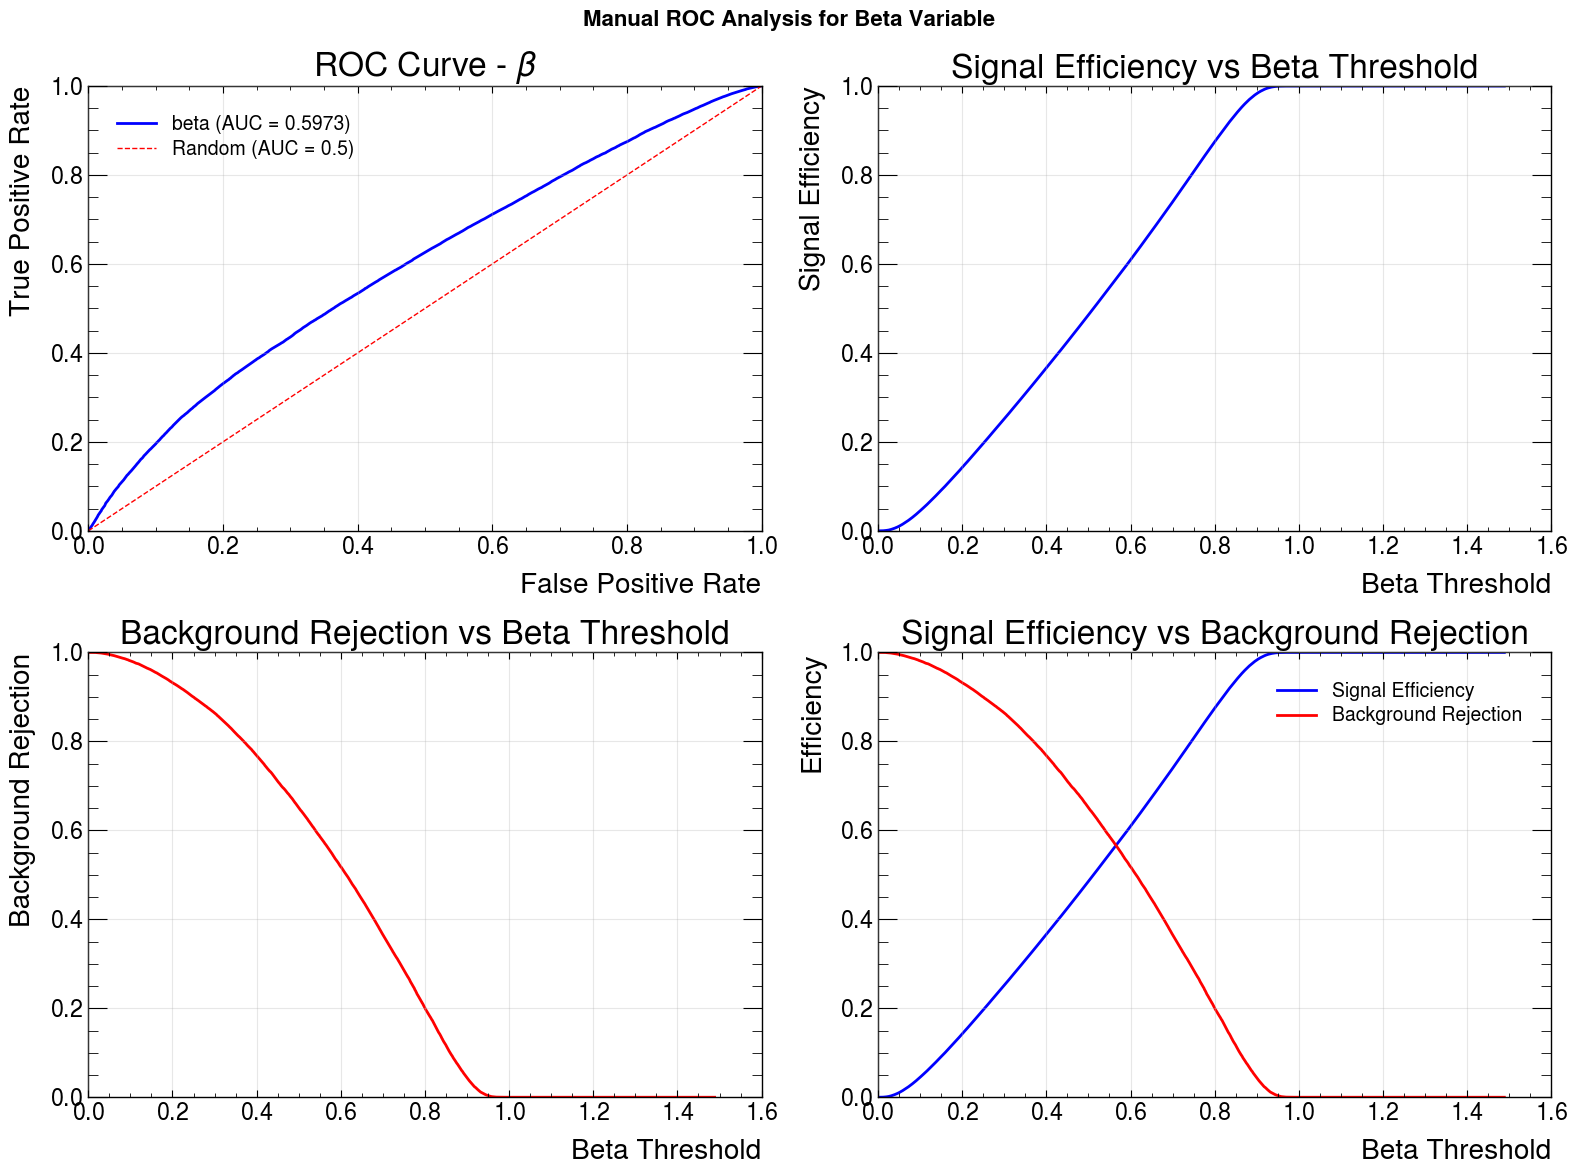

📈 ROC analysis plots generated successfully!


In [21]:
# Plot ROC curve and analysis results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Manual ROC Analysis for Beta Variable', fontsize=16, fontweight='bold')

# 1. ROC Curve
ax1 = axes[0, 0]
ax1.plot(fpr_sorted, tpr_sorted, 'b-', linewidth=2, label=f'beta (AUC = {auc_manual:.4f})')
ax1.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random (AUC = 0.5)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title(r'ROC Curve - $\beta$')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])

# 2. Signal Efficiency vs Threshold
ax2 = axes[0, 1]
ax2.plot(threshold_values, tpr_values, 'b-', linewidth=2)
ax2.set_xlabel('Beta Threshold')
ax2.set_ylabel('Signal Efficiency')
ax2.set_title('Signal Efficiency vs Beta Threshold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1])

# 3. Background Rejection vs Threshold
ax3 = axes[1, 0]
background_rejection = 1 - fpr_values
ax3.plot(threshold_values, background_rejection, 'r-', linewidth=2)
ax3.set_xlabel('Beta Threshold')
ax3.set_ylabel('Background Rejection')
ax3.set_title('Background Rejection vs Beta Threshold')
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1])

# 4. Both efficiencies together
ax4 = axes[1, 1]
ax4.plot(threshold_values, tpr_values, 'b-', linewidth=2, label='Signal Efficiency')
ax4.plot(threshold_values, background_rejection, 'r-', linewidth=2, label='Background Rejection')
ax4.set_xlabel('Beta Threshold')
ax4.set_ylabel('Efficiency')
ax4.set_title('Signal Efficiency vs Background Rejection')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("📈 ROC analysis plots generated successfully!")

###########

###########
## gg vs qq study

In [22]:
mask_qq = (df_cut['prod_type'] == 0) | (df_cut['prod_type'] == 2)
df_qq=df_cut[mask_qq]
df_qq['prod_type'][df_qq['prod_type']==2]=1
df_qq

/tmp/ipykernel_4112291/1124858640.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_qq['prod_type'][df_qq['prod_type']==2]=1
/tmp/ipykernel_4112291/1124858640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911143,0.259679,576.068012,0.191586,104.567887,5,-2.084358,2.084869,-1.135551,3.314730,0.938952,0.939661,0.962644,-0.962644,0,736.358765
911144,0.673129,422.433023,0.669301,40.949288,4,-1.462806,1.501093,-0.827567,3.177839,0.743676,0.647817,-0.611192,0.611192,0,736.358765
911145,0.52574,364.731574,0.498128,72.093790,6,-0.913760,1.689758,0.853770,1.151561,0.001788,0.444925,-0.646433,0.646433,0,736.358765
911146,0.040545,940.773049,0.016064,35.050987,4,-3.304555,4.148650,-3.870364,4.825702,-0.183372,-0.567504,-0.483828,0.483828,0,736.358765


### After this, the study continues at the same way as above